In [49]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [50]:
# Import house data
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 1a) Extract the two variables in consideration from the dataset

In [51]:
X = pd.DataFrame(houseData[['GrLivArea','GarageArea']])
X.head()

,GrLivArea,GarageArea
0,1710,548
1,1262,460
2,1786,608
3,1717,642
4,2198,836


#### 1b) Visualize the 2D distribution of the two variables extracted above, using a standard scatter plot.

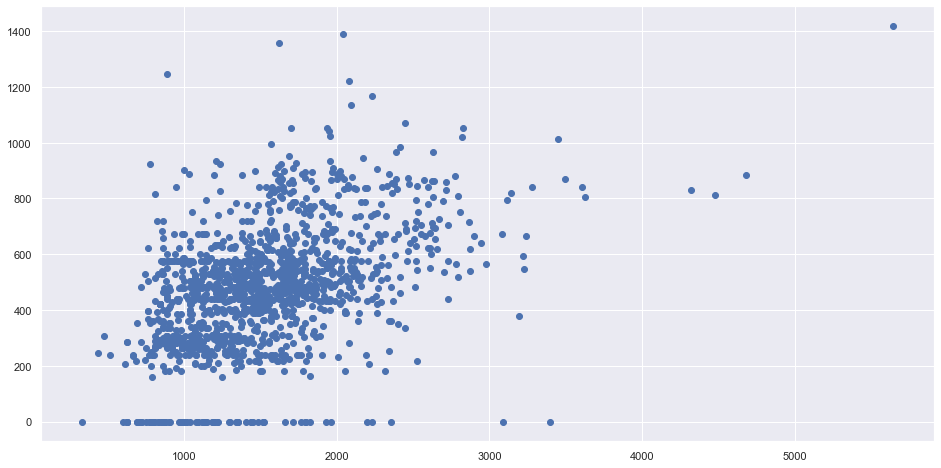

In [52]:
# Plot the Raw Data on a 2D grid
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", data = X)

#### 1c) Import k-Means Clustering model from Scikit-Learn : from sklearn.cluster import KMeans
#### 1d) Guess the number of clusters from the 2D scatterplot, and perform k-Means clustering with that.

In [16]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

#### 1e) Print the cluster centers, view their countplot, and visualize the clusters on the 2D scatterplot.

Features 	GrLivArea 	GarageArea

Cluster 0:	1088.15		375.58		
Cluster 1:	1700.51		522.5		
Cluster 2:	2577.98		683.8		


<AxesSubplot:xlabel='Cluster', ylabel='count'>

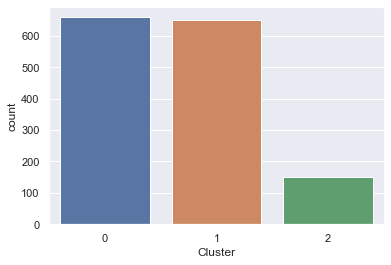

In [36]:
# Print the Cluster Centers
print("Features", "\tGrLivArea", "\tGarageArea")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t\t")
    print()

#------------------------------------------------------

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(x=X_labeled["Cluster"])

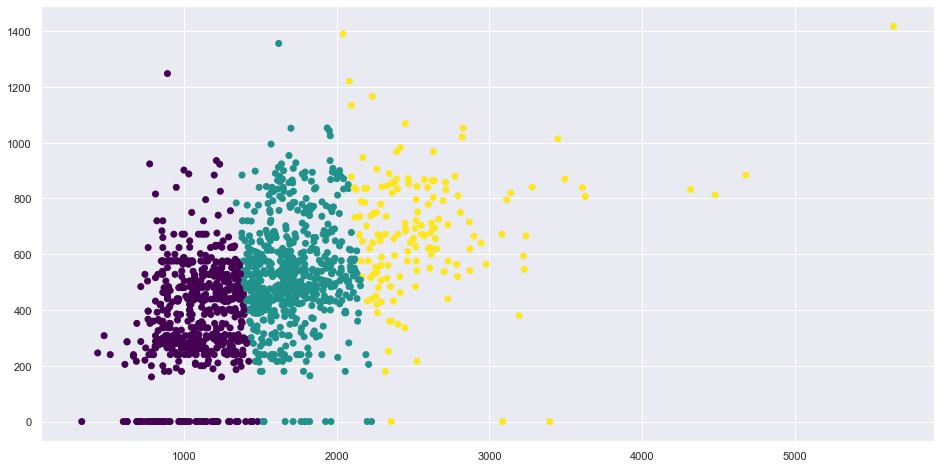

In [37]:
# Visualize the Clusters in the Data
f, axes = plt.subplots(1, 1, figsize=(1,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Cluster", cmap = 'viridis', data = X_labeled)

#### 2a) Import Anomaly model from Scikit-Learn : from sklearn.neighbors import LocalOutlierFactor

In [59]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

#### 2b) Guess the parameters from the 2D scatterplot, and perform Anomaly Detection with those parameters.

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

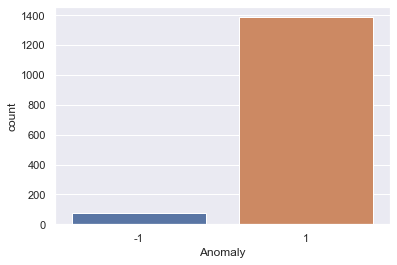

In [60]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=X_labeled["Anomaly"])

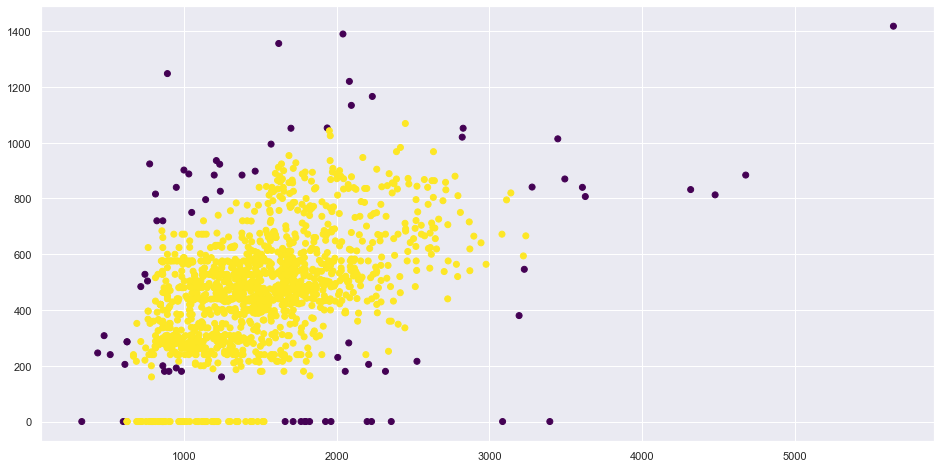

In [61]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "GrLivArea", y = "GarageArea", c = "Anomaly", cmap = 'viridis', data = X_labeled)

<AxesSubplot:xlabel='GarageArea', ylabel='Anomaly'>

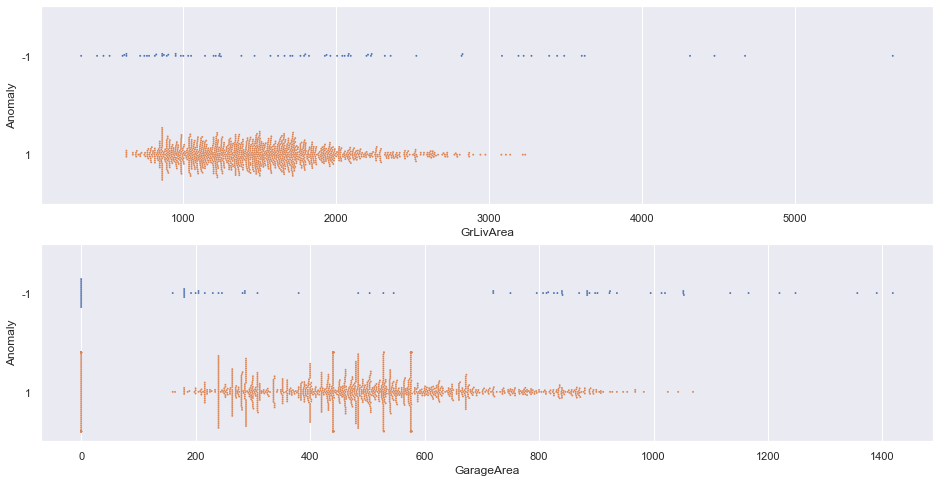

In [48]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.swarmplot(x = 'GrLivArea', y = 'Anomaly', data = X_labeled, ax = axes[0], size = 1.9)
sb.swarmplot(x = 'GarageArea', y = 'Anomaly', data = X_labeled, ax = axes[1], size = 1.9)